# MNIST

Classification of hand written digits by a simple neural network using TensorFlow 2 and Keras.

In [1]:
# Import Packages
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Acquire the dataset
mnist = tf.keras.datasets.mnist

# Split the data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Number of examples in both sets
print("\nTraining examples: " + str(len(train_labels)))
print("Testing examples: " + str(len(test_labels)))


Training examples: 60000
Testing examples: 10000


In [3]:
# Shape of the data
print("Shape of Training images: " + str(train_images.shape))
print("Shape of Training labels: " + str(train_labels.shape))
print("Shape of Testing images: " + str(test_images.shape))
print("Shape of Test lables: " + str(test_labels.shape))

Shape of Training images: (60000, 28, 28)
Shape of Training labels: (60000,)
Shape of Testing images: (10000, 28, 28)
Shape of Test lables: (10000,)


In [4]:
# Neural Network

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [5]:
# Train and evaluate the model
epochs = 10

history = model.fit(train_images, train_labels, epochs=epochs, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - acc: 0.9147 - val_loss: 0.1437 - val_acc: 0.9569
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1452 - acc: 0.9567 - val_loss: 0.0985 - val_acc: 0.9702
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1085 - acc: 0.9671 - val_loss: 0.0904 - val_acc: 0.9717
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - acc: 0.9737 - val_loss: 0.0826 - val_acc: 0.9750
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - acc: 0.9755 - val_loss: 0.0747 - val_acc: 0.9777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - acc: 0.9784 - val_loss: 0.0755 - val_acc: 0.9781
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - acc: 0.9810 - val_loss: 0.0709 - val_acc: 0.9788
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [8]:
# To be used in a CNN the data must be reshaped

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

print("Shape of Training images: " + str(train_images.shape))
print("Shape of Training labels: " + str(train_labels.shape))
print("Shape of Testing images: " + str(test_images.shape))
print("Shape of Test lables: " + str(test_labels.shape))

Shape of Training images: (60000, 28, 28, 1)
Shape of Training labels: (60000, 1)
Shape of Testing images: (10000, 28, 28, 1)
Shape of Test lables: (10000,)


In [9]:
# Convolutional Neural Network

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
# Train and evaluate the model

history_conv = model.fit(train_images, train_labels, epochs=epochs, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1678 - acc: 0.9492 - val_loss: 0.0637 - val_acc: 0.9786
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0627 - acc: 0.9809 - val_loss: 0.0493 - val_acc: 0.9828
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0434 - acc: 0.9865 - val_loss: 0.0458 - val_acc: 0.9851
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0315 - acc: 0.9898 - val_loss: 0.0413 - val_acc: 0.9871
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0232 - acc: 0.9922 - val_loss: 0.0446 - val_acc: 0.9858
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0406 - val_acc: 0.9887
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0148 - acc: 0.9951 - val_loss: 0.0443 - val_acc: 0.9881
Epoch 8/10
1875/1875 [==============================] - 9s 5m

<Figure size 432x288 with 0 Axes>

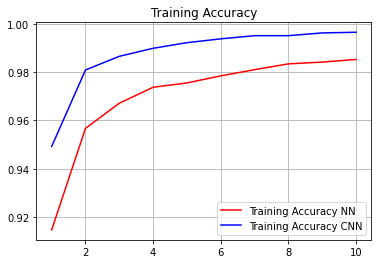

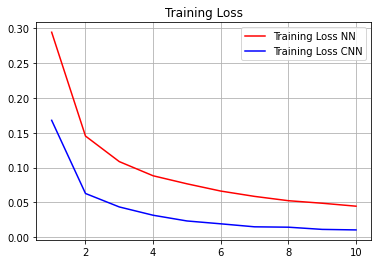

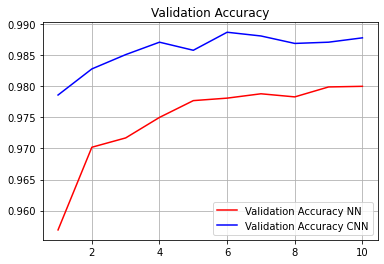

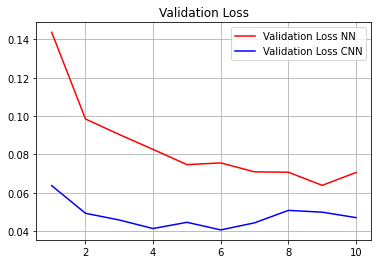

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot the difference

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

acc_conv = history_conv.history['acc']
loss_conv = history_conv.history['loss']
val_acc_conv = history_conv.history['val_acc']
val_loss_conv = history_conv.history['val_loss']

epochs = range(1, epochs + 1)

# ******************************************
#           TRAINING ACCURACY GRAPH
# *******************************************
plt.plot(epochs, acc, 'r', label="Training Accuracy NN")
plt.plot(epochs, acc_conv, 'b', label="Training Accuracy CNN")
plt.title('Training Accuracy')
plt.grid()
plt.legend()
plt.figure()

# *************************************
#           TRAINING LOSS GRAPH
# *************************************
plt.plot(epochs, loss, 'r', label="Training Loss NN")
plt.plot(epochs, loss_conv, 'b', label="Training Loss CNN")
plt.title('Training Loss')
plt.grid()
plt.legend()
plt.figure()

# ******************************************
#           VALIDATION ACCURACY GRAPH
# *******************************************
plt.plot(epochs, val_acc, 'r', label="Validation Accuracy NN")
plt.plot(epochs, val_acc_conv, 'b', label="Validation Accuracy CNN")
plt.title('Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()

# *************************************
#           TRAINING LOSS GRAPH
# *************************************
plt.plot(epochs, val_loss, 'r', label="Validation Loss NN")
plt.plot(epochs, val_loss_conv, 'b', label="Validation Loss CNN")
plt.title('Validation Loss')
plt.grid()
plt.legend()
plt.figure()

As we can see that a simple CNN model with just one convolutional and maxpool layer, the results are even better than the standard neural netow